- **Image Representation:**
  - Pixels: Collection of picture elements.
  - Grayscale Image:
    - 2D array with x and y coordinates.
    - Values: Float (0.0 to 1.0) or integer (0 to 255) for grayness level.
    - Example: Value 255 at (0,0) makes the top-left pixel white.
  - Color Images:
    - 3rd axis for red, green, and blue components.
    - Each component: 0.0 to 1.0 or 0 to 255.
    - Combinations yield 16.7 million colors.
  
- **Processing Images with NumPy:**
  - Importing Libraries:
    ```python
    import matplotlib.pyplot as plt
    import numpy as np
    ```

  - Loading Image:
    ```python
    painting = plt.imread("painting.png")
    ```

  - Checking Image Shape:
    ```python
    print(painting.shape)  # Output: (368, 640, 3)
    print(f"The image consists of {painting.shape[0] * painting.shape[1]} pixels")
    ```

  - Displaying Image:
    ```python
    plt.imshow(painting);
    ```

- **Image Operations with NumPy:**
  - Mirroring Image in X-direction:
    ```python
    plt.imshow(painting[:, ::-1]);
    ```

  - Setting Pixels on the First 30 Rows to White:
    ```python
    painting2 = painting.copy()
    painting2[0:30, :, :] = 1.0
    plt.imshow(painting2);
    ```

  - Creating a Function for Fading to Black:
    ```python
    def fadex(image):
        height, width = image.shape[:2]
        m = np.linspace(0, 1, width).reshape(1, width, 1)
        result = image * m  # Broadcasting used
        return result
    
    modified = fadex(painting)
    print(modified.shape)
    plt.imshow(modified);
    ```
  
In summary, images can be represented as arrays, allowing easy manipulation using NumPy functions. Examples include mirroring, setting pixel values, and creating functions for complex operations like fading to black.

(368, 640, 3)


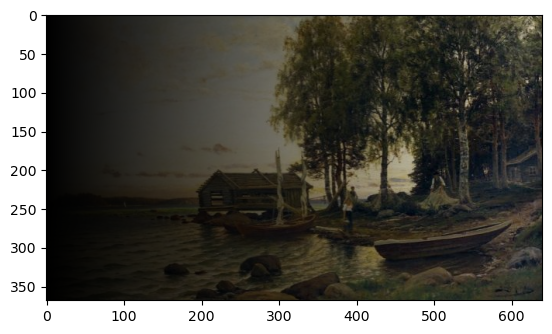

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def fadex(image):
        height, width = image.shape[:2]
        #  creates an array of width evenly spaced values between 0 and 1 
        m = np.linspace(0, 1, width).reshape(1, width, 1)
        result = image * m  # Broadcasting used
        return result
painting = plt.imread("part03-e11_to_grayscale/src/painting.png")
modified = fadex(painting)
print(modified.shape)
plt.imshow(modified);


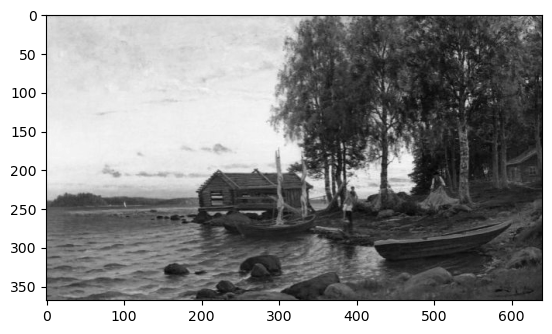

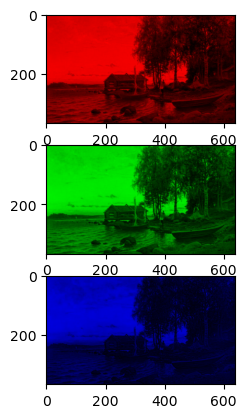

In [34]:
"""
Exercise 3.11 (to grayscale)
This exercise can give two points at maximum!

Part 1:

Write a function to_grayscale that takes an RGB image (three dimensional array) and 
returns a two dimensional gray-scale image. 

The conversion to gray-scale should take a weighted sum of the red, green, and blue values, and 
use that as the value of gray. 
The first axis is the x, the second is y, and the third is the color components (red, green, blue). 

Use the weights 0.2126, 0.7152, and 0.0722 for red, green, and blue, respectively. 
These weights are so because the human eye is most sensitive to green color and least sensitive to blue color.

In the main function you can, for example, use the provided image src/painting.png. 
Display the grayscale image with the plt.imshow function. 
You may have to call the function plt.gray to set the color palette (colormap) to gray. 
(See help(plt.colormaps) for more information about colormaps.)

Part 2:

Write functions to_red, to_green, and to_blue that get a three dimensional array as a parameter and 
return a three dimensional arrays. 

For instance, the function to_red should zero out the green and blue color components and return the result.

In the main function create a figure with three subfigures: 

the top one should be the red image, the middle one the green image, and the bottom one the blue image.
"""
import numpy as np
import matplotlib.pyplot as plt

def to_red(image_array):
    # zeroes out green, blue
    image_array[:, :, [1,2]] = 0

    return image_array

def to_green(image_array):
    # zeroes out red, blue
    image_array[:, :, [0,2]] = 0
    return image_array
    
def to_blue(image_array):
    # zeroes out green, red
    image_array[:, :, [ 0, 1]] = 0
    return image_array

def to_grayscale(image_array):
    # gray_scale image
    # red, green, blue is weight sum that transform into grayscale image
    gray_image = 0.2126 * image_array[:, :, 0] + 0.7152 * image_array[:, :, 1] + 0.0722 * image_array[:, :, 2]

    return gray_image
def main():
    image_array = plt.imread("part03-e11_to_grayscale/src/painting.png")
    gray_image = to_grayscale(image_array)
    plt.gray()
    plt.imshow(gray_image)

    # top red, middle green, bottom blue
    row, column = 3, 1
    fig, ax = plt.subplots(row, column)
    red_image = image_array.copy()
    red_image = to_red(red_image)
    ax[0].imshow(red_image) # top row red image
    green_image = image_array.copy()
    ax[1].imshow(to_green(green_image)) # middle row green image
    blue_image = image_array.copy()
    ax[2].imshow(to_blue(blue_image)) # bottom row blue image
    plt.show()

"""
def to_grayscale(image):
    w=np.array([0.2126, 0.7152, 0.0722]).reshape(1, 1, 3)
    a = image * w
    return a.sum(axis=2)
 
def to_red(image):
    image2=image.copy()
    image2[:,:,[1,2]] = 0
    return image2
 
def to_green(image):
    image2=image.copy()
    image2[:,:,[0,2]] = 0
    return image2
 
def to_blue(image):
    image2=image.copy()
    image2[:,:,[0,1]] = 0
    return image2
 
def main():
    painting=plt.imread("src/painting.png")
    gray = to_grayscale(painting)
    red = to_red(painting)
    green = to_green(painting)
    blue = to_blue(painting)
    plt.imshow(painting)
    plt.figure()
    plt.gray()
    plt.imshow(gray)
    plt.subplot(3, 1, 1)
    plt.imshow(red)
    plt.subplot(3, 1, 2)
    plt.imshow(green)
    plt.subplot(3, 1, 3)
    plt.imshow(blue)
    plt.show()
"""

main()

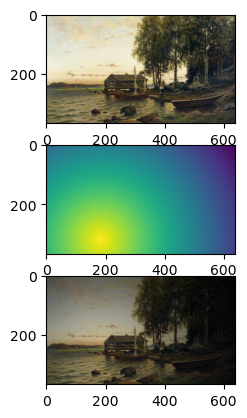

In [27]:
"""
Exercise 3.12 (radial fade)
Make program that does fading of an image as earlier, except now not in horizontal direction but in radial direction. 
As we move away from the centre of the image, the pixels fade to black.

Part 1:

Write function center that returns coordinate pair (center_y, center_x) of the image center. 
Note that these coordinates might not be integers. Example of usage:

print(center(np.zeros((10, 11, 3))))
(4.5, 5)
The function should work both for two and three dimensional images, that is grayscale and color images.

Write also function radial_distance that returns 
for image with width w and height h an array with shape (h,w), where the number at index (i,j) 
gives the euclidean distance from the point (i,j) to the center of the image.

Part 2:

Create function scale(a, tmin=0.0, tmax=1.0) that 
returns a copy of the array a with its elements scaled to be in the range [tmin,tmax].

Using the functions radial_distance and scale write function radial_mask that takes an image as a parameter and
returns an array with same height and width filled with values between 0.0 and 1.0. 

Do this using the scale function. To make the resulting array values near the center of array to be close to 1 
and closer to the edges of the array are values closer to be 0, subtract the previous array from 1.

Write also function radial_fade that returns the image multiplied by its radial mask.

Test your functions in the main function, which should create, using matplotlib, 
a figure that has three subfigures stacked vertically. On top the original painting.png, in the middle the mask, 
and on the bottom the faded image.
"""

import numpy as np
import matplotlib.pyplot as plt

def center(a):
    # returns coordinate pair (center_y, center_x) of the image center.
    # find the length of width and height and cut them in the middle
    # work for 2D and 3D
    height, width = a.shape[0], a.shape[1]

    # we sub tract 1 because from height because array start at 0 
    return (height-1)/2.0, (width-1)/2.0   # note the order: (center_y, center_x)

def eucldian_distance(x, y, center_x, center_y):
    return np.sqrt((x - center_x)**2 + (y - center_y)**2)

def radial_distance(a):
    """
    for image with width w and height h an array with shape (h,w), 
    where the number at index (i,j) 
    gives the euclidean distance from the point (i,j) to the center of the image.
    
    The distance is calculated as:

    sqrt((x - center_x)^2 + (y - center_y)^2)

    """
    center_x, center_y = center(a)
    radial = []
    height, width, _ = a.shape

    for i in range(height):
        for j in range(width):
            
            current = eucldian_distance(j, i, center_x, center_y)
            radial.append(current)
    return np.array(radial).reshape((height, width))

def scale(a, tmin=0.0, tmax=1.0):
    """
    Returns a copy of array 'a' with its values scaled to be in the range
[tmin,tmax].
    we going to use linear interpolation 
    from current max and min value of a to desire range between tmin, tmax
    """
    # np.interp(image_array_value, (current min , current max), (desire min, desire max))
    #return np.interp(a, (a.min(), a.max()), (tmin, tmax))

    min = np.min(a)
    max = np.max(a)
    a = (a - min) / (max - min)
    a = a * (tmax - tmin) + tmin
    return a
   

def radial_mask(a):
    # returns an array with same height and width
    # filled with values between 0.0 and 1.0
    """
    To make the resulting array values near the center of array to be close to 1 and 
    closer to the edges of the array are values closer to be 0
    # this inturn will make the center portion brighter and closer to the edge darker
    radial_distance calculate the distance to cover and scale
    scaling function or linear interpolation made this smoother transition.
    """
    # we are subtracting previous array from 1 
    return scale(1 - radial_distance(a))

def radial_fade(a):
    """
    radia_mask(a) return array
        Original array:
        [[1 2 3]
        [4 5 6]
        [7 8 9]]
    Making it new axis or reshape
        Modified array:
        [[3]
        [6]
        [9]
        [2]
        [5]
        [8]
        [1]
        [4]
        [7]]
    a * (radial_mask reshape) -> we mask the original image
    """
    return a * radial_mask(a)[:,:,np.newaxis]


def main():
    image_array = plt.imread("part03-e12_radial_fade/src/painting.png")
    """
    op the original painting.png, 
    in the middle the mask, and 
    on the bottom the faded image.
    """

    plt.subplot(3, 1, 1)
    plt.imshow(image_array)
    plt.subplot(3, 1, 2)
    plt.imshow(radial_mask(image_array))
    plt.subplot(3, 1, 3)
    plt.imshow(radial_fade(image_array))
    plt.show()
"""
def center(a):
    return (a.shape[0]-1)/2, (a.shape[1]-1)/2
 
def radial_distance(a):
    cy, cx = center(a)
    x=np.abs(np.arange(a.shape[1])-cx)
    y=np.abs(np.arange(a.shape[0])-cy)
    X, Y = np.meshgrid(x, y)
    s = np.sqrt(X**2 + Y**2)
    return s
 
def scale(a, tmin=0.0, tmax=1.0):
    '''Returns a copy of array 'a' with its values scaled to be in the range
[tmin,tmax].'''
    min = np.min(a)
    max = np.max(a)
    a = (a - min) / (max - min)
    a = a * (tmax - tmin) + tmin
    return a
 
def radial_mask(a):
    s = radial_distance(a)
    if s.shape[0] <= 2 or s.shape[1] <= 2:
        return np.ones(s.shape)
    mask = scale(s)
    return 1 - mask
 
def radial_fade(a):
    m = radial_mask(a)[:,:,np.newaxis]
    return a*m
"""
main()

**Generating Data:**
- `n=5`: Number of clusters to generate.
- `l=256`: Image size (l x l).
- `im`: Initialize a blank image.
- `points`: Randomly select n^2 pixels in the image and set their value to 1.
- Example:
    ```python
    n = 5
    l = 256
    im = np.zeros((l, l))
    np.random.seed(0)
    points = np.random.randint(0, l, (2, n**2))
    im[points[0], points[1]] = 1
    ```

**Image Blurring:**
- Use Gaussian filter to blur the image.
- `sigma=l/(8.*n)`: Adjust the sigma parameter based on image size and number of clusters.
- Example:
    ```python
    from scipy import ndimage
    im2 = ndimage.gaussian_filter(im, sigma=l/(8.*n))
    ```

**Finding Clusters:**
- Create a mask of pixels above the mean intensity.
- Use connected components to label clusters.
- Example:
    ```python
    mask = im2 > im2.mean()
    label_im, nb_labels = ndimage.label(mask)
    ```

**Number of Clusters:**
- Print the number of identified clusters.
- Example:
    ```python
    print(f"Number of clusters is {nb_labels}")
    ```

**Applications of Image Processing:**
- Denoising
- Deblurring
- Image segmentation
- Feature extraction
- Zooming, rotating
- Filtering

**Example Application:**
- Counting birds or stars in an image automatically.
- Efficient for large datasets where manual counting is impractical.

Image processing indeed plays a crucial role in automating tasks that would be tedious for humans, especially when dealing with a high volume of images.

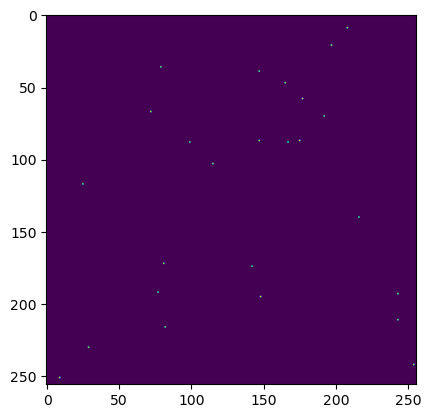

In [28]:
n=5
l=256
im = np.zeros((l,l))
np.random.seed(0)
points = np.random.randint(0, l, (2, n**2))  # sample n*n pixels from the array im
im[points[0], points[1]] = 1
plt.imshow(im);

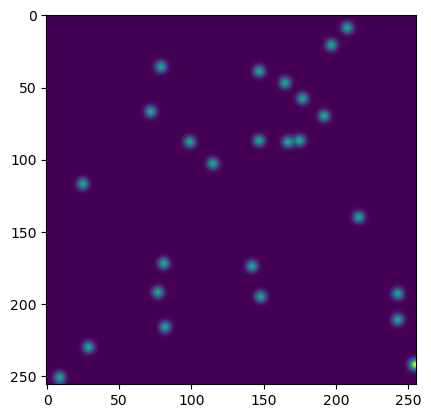

In [33]:
from scipy import ndimage
im2 = ndimage.gaussian_filter(im, sigma=l/(20.*n))  # blur the image a bit
plt.imshow(im2);

Number of clusters is 24


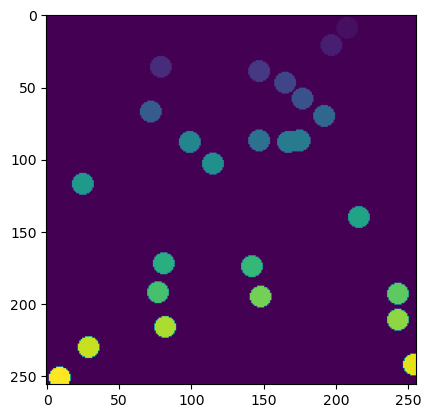

In [34]:
mask = im2 > im2.mean()     # mask those pixels whose intensity is above mean
label_im, nb_labels = ndimage.label(mask)   # connected components form clusters
print(f"Number of clusters is {nb_labels}")
plt.imshow(label_im);